<a href="https://colab.research.google.com/github/LJMatthieu/IPMA_ARGO_FLOAT/blob/main/PROJET_IMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install basemap

In [ ]:
%matplotlib inline
%pylab inline
from mpl_toolkits.basemap import Basemap
import sklearn
import pandas as pd
from scipy.stats.mstats import zscore
import warnings
warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(20,20) # graph size

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
%%bigquery --project alert-ground-261008 output
SELECT lon, lat, year, AVG(ssh) AS mean_ssh
FROM bdo2020.bdo2020.1998_2015_withtimes
WHERE lon>0 AND lon<35 AND lat>30 AND lat<35
GROUP BY lon, lat, year
ORDER BY year

In [ ]:
# sample of the dataframe
output

,lon,lat,year,mean_ssh
0,32.625,33.875,1998,-0.022708
1,31.875,34.125,1998,-0.081994
2,25.875,33.875,1998,0.010281
3,17.625,33.875,1998,0.028391
4,31.375,33.375,1998,-0.057385
...,...,...,...,...
15746,23.375,34.375,2016,-0.162900
15747,33.375,32.125,2016,-0.000400
15748,12.375,34.625,2016,0.050600
15749,33.875,32.375,2016,-0.028100


In [ ]:
global_list = [];
index_alrady = [];
list_year = [];
first_year = 1998;
last_year = 2015;

#init list with forst year
for i in range(len(output.index)):
  if(output.year[i] == first_year):

    temp_list = [];
    temp_list.append(i);
    index_alrady.append(i)
    global_list.append(temp_list);

  else: break;

# complete each list with index
for i in range(len(output.index)):

  if( output.year[i] not in list_year):
    list_year.append(output.year[i]);

  if(output.year[i] == last_year) : break;
  if(i not in index_alrady):
    for j in range(len(global_list)):
      if( output.lat[i] == output.lat[j] ):
       if( output.lon[i] == output.lon[j] ):
          global_list[j].append(i)
          index_alrady.append(i)

print(global_list)


[[0, 2022, 3480, 4899, 6820, 8225, 10167, 11361, 14048, 14580, 16634, 18031, 20567, 22835, 23391, 25256, 27787], [1, 1732, 3112, 4654, 6943, 8845, 10428, 11234, 13849, 15815, 17525, 18177, 20665, 22933, 23378, 25423, 26733], [2, 2767, 3429, 5674, 5975, 8541, 10664, 12315, 12768, 15136, 17708, 18695, 21306, 22071, 23831, 25679, 27905], [3, 2441, 3316, 5285, 6533, 8539, 9891, 12620, 12998, 15940, 16387, 18192, 21238, 21729, 24784, 26014, 26603], [4, 2690, 4223, 4471, 6705, 7997, 10764, 11289, 13678, 15070, 17214, 18486, 21002, 22619, 24552, 24960, 28048], [5, 2923, 4105, 4499, 7479, 8899, 9721, 12312, 14380, 16182, 17634, 19059, 20939, 22025, 24624, 24900, 27343], [6, 2724, 4386, 4784, 5903, 8710, 9695, 11296, 14271, 15233, 17568, 18015, 19714, 22054, 23320, 26215, 27324], [7, 2007, 3949, 5137, 6831, 9212, 9447, 12587, 14163, 16057, 17929, 18697, 20912, 22418, 24390, 24948, 26583], [8, 1799, 3988, 5089, 7095, 8385, 10688, 12033, 12990, 15167, 17237, 18163, 21089, 22752, 24591, 26118, 277

Nous allons désormais afficher l'évolution de la déviation de SSH par rapport au modèle sur une durée de 15 ans.

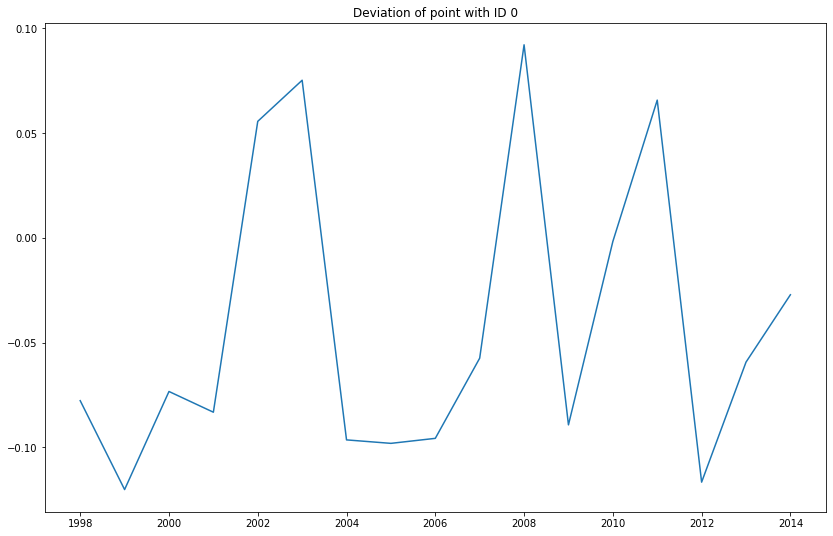

In [ ]:
#Print curve y=ax+b
import matplotlib.pyplot as plt

y = [];
ID = 0;

for i in range(len(global_list[ID])):
  y.append(output.mean_ssh[i])

x = [1998,1999,2000,2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,2012,2013,2014]

fig = plt.figure(1, figsize=(14,9))

plt.title('Deviation of point with ID 0')
plt.plot(x, y)

plt.show()


Nous constatons que sur un seul point géographique comme nous l'avons fait il y atrop de bruit pour pouvoir dégager une tendance. Nous allons donc essayer de créer des zones plus grande et moins sensible au bruit pour obtenir une tendance et ainsi créer un modèle de prédiction

In [ ]:
from math import radians, cos, sin, asin, sqrt

first_year = 1998;
friends_list = [];

for i in range(len(output.index)):
  if(output.year[i] == first_year):

    

  else: break;


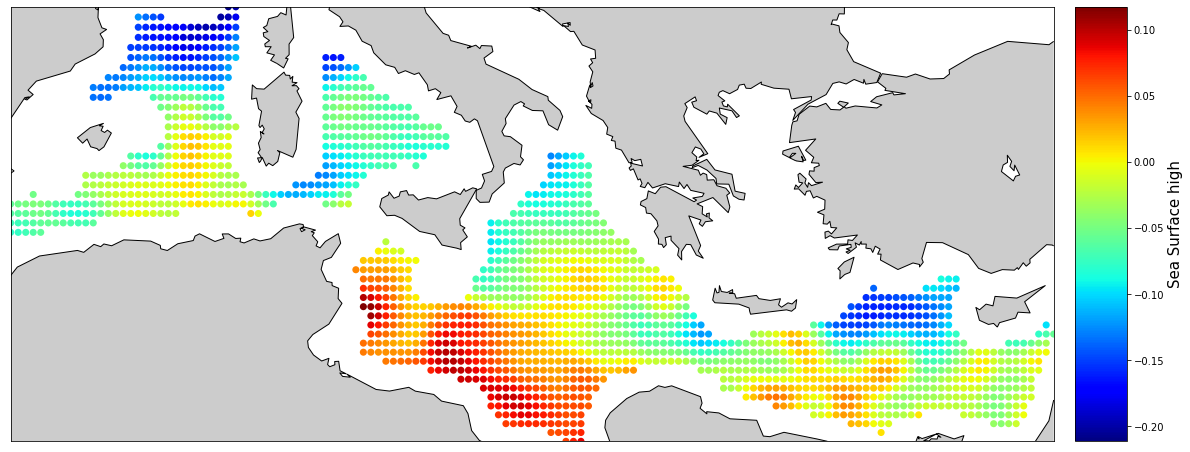

In [ ]:
plot_im(output.lon,output.lat,output.mean_ssh,50,'Sea Surface high')